<a href="https://colab.research.google.com/github/esephaneli/moneyBall/blob/main/moneyBallFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('players_data-2024_2025.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA',
       '#OPA/90', 'AvgDist'],
      dtype='object', length=267)

In [4]:
df.isnull().sum()

,0
Rk,0
Player,0
Nation,7
Pos,0
Squad,0
...,...
Stp,2642
Stp%,2643
#OPA,2642
#OPA/90,2642


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 267 entries, Rk to AvgDist
dtypes: float64(111), int64(121), object(35)
memory usage: 5.8+ MB


In [6]:
df["Comp"].value_counts()

,count
Comp,
it Serie A,634
es La Liga,601
eng Premier League,574
fr Ligue 1,553
de Bundesliga,492


In [7]:
df["Pos"].value_counts()

,count
Pos,
DF,859
MF,589
FW,371
"FW,MF",325
"MF,FW",230
GK,212
"DF,MF",110
"MF,DF",81
"DF,FW",53


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,2854.0,1427.500000,824.023159,1.0,714.250,1427.5,2140.750,2854.0
Age,2846.0,25.018974,4.491624,15.0,22.000,25.0,28.000,41.0
Born,2846.0,1998.637034,4.497922,1982.0,1996.000,1999.0,2002.000,2008.0
MP,2854.0,19.012964,11.502122,1.0,9.000,20.0,30.000,38.0
Starts,2854.0,13.497547,11.322991,0.0,3.000,11.0,23.000,38.0
...,...,...,...,...,...,...,...,...
Stp,212.0,14.377358,13.874832,0.0,2.000,10.5,22.000,64.0
Stp%,211.0,6.159716,4.074863,0.0,4.000,5.6,7.900,33.3
#OPA,212.0,18.768868,18.276921,0.0,3.000,14.0,30.250,89.0
#OPA/90,212.0,1.164528,1.008750,0.0,0.670,1.0,1.470,10.0


In [9]:
# Ensure column names are unique by appending a number if duplicates exist in the original dataframe
cols = pd.Series(df.columns)
for dup in cols[cols.duplicated()].unique():
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
df.columns = cols

# Now proceed with the rest of the column cleaning
df.columns = (df.columns.str.strip()
                        .str.lower()
                        .str.replace('[^a-z0-9_]+', '_', regex=True)
                        .str.replace('_+', '_', regex=True)
                        .str.strip('_'))

# Re-ensure uniqueness after cleaning, in case cleaning created new duplicates (less likely now)
cols = pd.Series(df.columns)
for dup in cols[cols.duplicated()].unique():
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
df.columns = cols

In [10]:
choice_cols = [
    "player", "nation", "pos", "squad", "comp", "age",
    "mp", "starts", "min", "90s",
    "gls", "ast", "g_a", "xg", "xag", "npxg", "g_pk",
    "tkl", "tklw", "int", "clr", "blocks", "tkl_int", "err",
    "prgp", "prgc", "kp", "cmp_pct_pass", "xa", "ppa",
    "crdy", "crdr", "recov"
]

In [11]:
choice_cols = [c for c in choice_cols if c in df.columns]
dfc = df[choice_cols].copy()

In [12]:
dfc["90s"] = dfc["90s"].replace(0,np.nan)

per90 = {
    "gls_per90": ("gls", "90s"),
    "ast_per90": ("ast", "90s"),
    "xg_per90": ("xg", "90s"),
    "xa_per90": ("xa", "90s"),
    "xag_per90": ("xag", "90s"),
    "npxg_per90": ("npxg", "90s"),
    "kp_per90": ("kp", "90s"),
    "prgp_per90": ("prgp", "90s"),
    "prgc_per90": ("prgc", "90s"),
    "tkl_int_per90": ("tkl_int", "90s"),
    "clr_per90": ("clr", "90s"),
    "blocks_per90": ("blocks", "90s"),}


In [13]:
for new_col, (num_col, den_col) in per90.items():
    if num_col in dfc.columns and den_col in dfc.columns:
        dfc[new_col] = dfc[num_col] / dfc[den_col]

In [14]:
dfc_filt = dfc.loc[dfc["min"].fillna(0) >= 900].copy()

In [15]:
def score_forward(r):
  return(
      0.50 * r.get("gls_per90",0) +
      0.25 * r.get("xg_per90",0) +
      0.15 * r.get("kp_per90",0) +
      0.10 * r.get("prgp_per90",0)
  )

In [16]:
def score_mid(r):
    return (
        0.25 * r.get("gls_per90", 0) +
        0.25 * r.get("xag_per90", 0) +
        0.25 * r.get("kp_per90", 0) +
        0.25 * r.get("prgp_per90", 0)
    )

In [17]:
def score_def(r):
    return (
        0.40 * r.get("tkl_int_per90", 0) +
        0.25 * r.get("clr_per90", 0) +
        0.20 * r.get("blocks_per90", 0) +
        0.15 * r.get("prgp_per90", 0)  # çıkış oyunu da değerli
    )

In [18]:
def position_bucket(pos):
   # "DF,MF" gibi birleşik gelenleri basitçe kovaya atıyoruz
   if pd.isna(pos): return "OTHER"
   if "GK" in pos: return "GK"
   if "DF" in pos: return "DF"
   if "MF" in pos: return "MF"
   if "FW" in pos: return "FW"
   return "OTHER"

dfc_filt["pos_bucket"] = dfc_filt["pos"].apply(position_bucket)

In [19]:
dfc_filt["perf_score"] = 0.0
dfc_filt.loc[dfc_filt["pos_bucket"]=="FW", "perf_score"] = dfc_filt[dfc_filt["pos_bucket"]=="FW"].apply(score_forward, axis=1)
dfc_filt.loc[dfc_filt["pos_bucket"]=="MF", "perf_score"] = dfc_filt[dfc_filt["pos_bucket"]=="MF"].apply(score_mid, axis=1)
dfc_filt.loc[dfc_filt["pos_bucket"]=="DF", "perf_score"] = dfc_filt[dfc_filt["pos_bucket"]=="DF"].apply(score_def, axis=1)

In [20]:
for col in ["age", "min", "perf_score"]:
  if col in dfc_filt.columns:
    c = dfc_filt[col].astype(float)
    dfc_filt[col + "_norm"] = (c - c.min()) / (c.max()-c.min() + 1e-9)


In [21]:
dfc_filt["value_index"] = (
    0.60 * dfc_filt["perf_score_norm"] +
    0.20 * dfc_filt["min_norm"] +
    0.20 * (1 - dfc_filt["age_norm"])
)

In [22]:
def top_n_by_pos(df_, bucket, n=10):
    cols_show = ["player","nation","age","squad","comp","pos","min","perf_score","value_index"]
    return (df_.loc[df_["pos_bucket"]==bucket, cols_show]
               .sort_values("value_index", ascending=False)
               .head(n))

top_fw = top_n_by_pos(dfc_filt, "FW", 10)
top_mf = top_n_by_pos(dfc_filt, "MF", 10)
top_df = top_n_by_pos(dfc_filt, "DF", 10)

# Hepsini tek tabloda görmek için:
top_all = (pd.concat([
    top_fw.assign(bucket="FW"),
    top_mf.assign(bucket="MF"),
    top_df.assign(bucket="DF")
]).reset_index(drop=True))

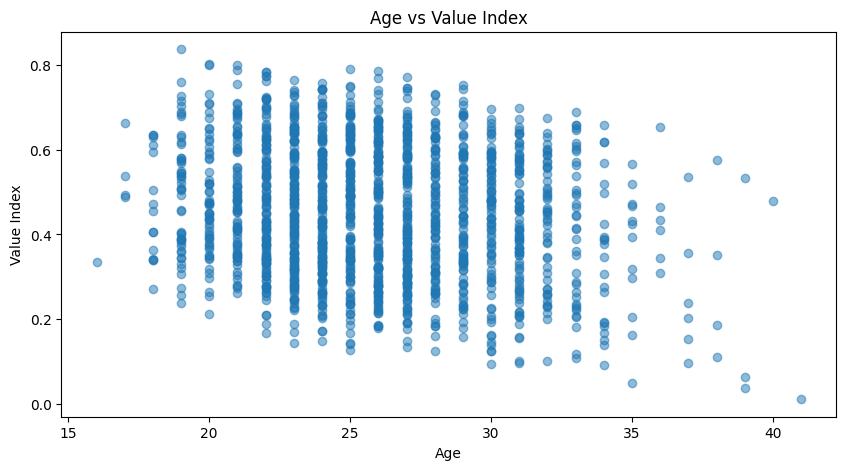

In [23]:
plt.figure(figsize=(10,5))
subset = dfc_filt.dropna(subset=["age","value_index"]).copy()
plt.scatter(subset["age"], subset["value_index"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Value Index")
plt.title("Age vs Value Index")

plt.show()

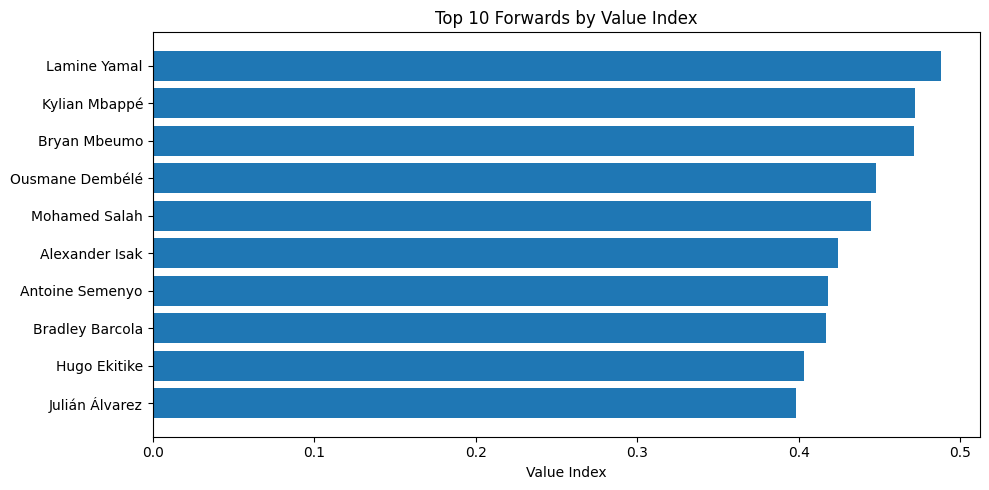

In [24]:
plt.figure(figsize=(10,5))
plot_fw = top_fw.sort_values("value_index", ascending=True)
plt.barh(plot_fw["player"], plot_fw["value_index"])
plt.xlabel("Value Index")
plt.title("Top 10 Forwards by Value Index")
plt.tight_layout()

plt.show()

In [25]:
drop_cols = ["player", "nation", "squad", "comp"]
X = dfc_filt.drop(columns=drop_cols)

In [35]:
y = dfc_filt["value_index"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X.select_dtypes(include=["float64", "int64"])),
                         columns=X.select_dtypes(include=["float64", "int64"]).columns,
                         index=X.index) # Preserve the index

In [38]:
X_cat = pd.get_dummies(dfc_filt[["pos"]], drop_first=True) # X_cat should be based on dfc_filt

In [39]:
X_ready = pd.concat([X_imputed, X_cat], axis=1)

In [40]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_ready), columns=X_ready.columns, index=X_ready.index) # Preserve the index

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [46]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [48]:
print("score: ", r2_score(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

score:  0.9999785970035915
MSE:  4.4654650196398363e-07
MAE:  0.0004322772179045329


In [49]:
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))

Train R²: 0.9999705668807181
Test R²: 0.9999785970035915


In [50]:
X = dfc_filt[[
    "xg_per90", "xag_per90", "kp_per90", "prgp_per90",
    "prgc_per90", "tkl_int_per90", "clr_per90", "blocks_per90"
]]

In [51]:
y = dfc_filt["value_index"]

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [56]:
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))

Train R²: 0.9699975188098394
Test R²: 0.7272921229459932


In [57]:
fi = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(fi.head(10))

         Feature  Importance
6      clr_per90    0.515199
3     prgp_per90    0.279272
5  tkl_int_per90    0.053597
4     prgc_per90    0.042362
7   blocks_per90    0.031952
0       xg_per90    0.028764
2       kp_per90    0.025617
1      xag_per90    0.023237


#clr_per90 = Clearances per 90 => Savunma katkısı en belirleyici faktör.

#prgp_per90 = Progressive Passes per 90 => Topu ileri taşıma / pas katkısı çok önemli.

#tkl_int_per90 = Tackles + Interceptions => Rakip top kazanımı (savunma pres gücü).

#prgc_per90 = Progressive Carries => Topla dripling yaparak oyun kurma etkisi.

#blocks_per90 = Block => Savunmada blok katkısı.

#xg_per90 = Goal Prob. => Gol beklentisi.

#kp_per90 = Passes => Kilit pas katkısı.

#xag_per90 = Asist => Beklenen asist katkısı.

In [58]:
new_player = [[0.55, 0.35, 2.8, 3.1, 1.9, 0.9, 0.8, 0.7]]  # örnek per90 istatistikleri
pred = model.predict(scaler.transform(new_player))
print("Tahmini Value Index:", pred)

Tahmini Value Index: [0.3654569]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
dfc_filt["predicted_value"] = model.predict(scaler.transform(X))
top_undervalued = dfc_filt.sort_values("predicted_value", ascending=False).head(10)
top_undervalued[["player", "pos", "squad", "value_index", "predicted_value"]]

,player,pos,squad,value_index,predicted_value
1189,Dean Huijsen,DF,Bournemouth,0.837591,0.771345
776,Guela Doué,DF,Strasbourg,0.799822,0.755281
596,Diego Coppola,DF,Hellas Verona,0.801428,0.753524
1466,Diogo Leite,DF,Union Berlin,0.791640,0.752580
2223,Antonee Robinson,DF,Fulham,0.786826,0.751644
1828,Murillo,DF,Nott'ham Forest,0.783685,0.747197
1161,Omar El Hilali,DF,Espanyol,0.803421,0.745845
142,Jon Aramburu,DF,Real Sociedad,0.773888,0.741346
1106,Joško Gvardiol,DF,Manchester City,0.782900,0.733481
2769,Neco Williams,DF,Nott'ham Forest,0.764615,0.731739


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value_index'].plot(kind='hist', bins=20, title='value_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['predicted_value'].plot(kind='hist', bins=20, title='predicted_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='value_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='value_index', y='predicted_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['value_index'].plot(kind='line', figsize=(8, 4), title='value_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['predicted_value'].plot(kind='line', figsize=(8, 4), title='predicted_value')
plt.gca().spines[['top', 'right']].set_visible(False)

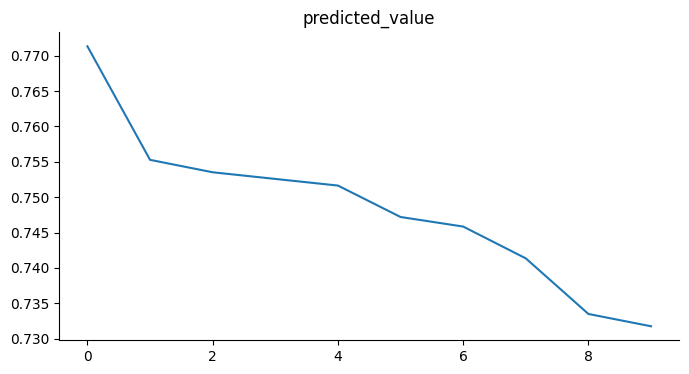

In [62]:
from matplotlib import pyplot as plt
_df_7['predicted_value'].plot(kind='line', figsize=(8, 4), title='predicted_value')
plt.gca().spines[['top', 'right']].set_visible(False)